# Linear Regression Mini-Project: Rice Yield Advisory

You are helping the **Krishibhavan Agronomy Advisory Desk** prepare a linear regression model that predicts
rice yield (`tonnes per hectare`) using basic field observations.

In [17]:
!pip show scikit-learn // pip install scikit-learn

Name: scikit-learn
Version: 1.7.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: 
Location: C:\Users\tamra\AppData\Local\Programs\Python\Python313\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: 
---
Name: pip
Version: 24.3.1
Summary: The PyPA recommended tool for installing Python packages.
Home-page: https://pip.pypa.io/
Author: 
Author-email: The pip developers <distutils-sig@python.org>
License: MIT
Location: C:\Users\tamra\AppData\Local\Programs\Python\Python313\Lib\site-packages
Requires: 
Required-by: 
---
Name: scikit-learn
Version: 1.7.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: 
Location: C:\Users\tamra\AppData\Local\Programs\Python\Python313\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: 


## Learning Goals
- Load and inspect agronomic data with pandas.
- Visualise how farming practices influence yield outcomes.
- Prepare feature matrices (`X`) and target vectors (`y`).
- Fit and evaluate a `LinearRegression` model.
- Communicate what the model means for field-level decisions.

## Dataset Snapshot
`data/rice_yield_management.csv` contains 320 field-season observations from rice-growing districts across
India. You will see variables covering nutrients (N/P/K), irrigation types, climate, disease pressure, and the
harvest yield. Feel free to start with a small subset of features and expand as you gain confidence.

## How to Use This Notebook
1. Follow the tasks in order. Each coding cell includes **starter scaffolding** between markers:
   ```
   # YOUR CODE START
   ... placeholders you need to replace ...
   # YOUR CODE END
   ```
2. Replace placeholders (`None`, `...`, lists with `[]`, etc.) with working code.
3. Keep the validation checks (`if condition: raise ValueError`) so you know when something is missing.
4. Add Markdown commentary wherever a task asks for interpretation or reflection.
5. Document any random seeds and assumptions so that your results are reproducible.

In [18]:
# If you are running in a fresh environment, uncomment the next line.
# !pip install numpy pandas seaborn matplotlib scikit-learn

In [19]:
import pathlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

sns.set_theme(style="ticks", palette="viridis")
plt.rcParams["figure.figsize"] = (8, 5)


In [20]:
raw_data=pd.read_csv("./rice_yield_management.csv")
raw_data.copy()

,region,season,soil_type,irrigation_type,previous_crop,field_area_ha,soil_ph,organic_matter_pct,nitrogen_kg_ha,phosphorus_kg_ha,...,avg_temp_c,rainfall_mm,solar_radiation_MJ_m2,pesticide_cost_usd_ha,seed_density_kg_ha,disease_pressure_index,growth_duration_days,lodging_risk_score,field_elevation_m,yield_tonnes_per_ha
0,Brahmaputra_Floodplains,Rabi,Loam,Canal_Flood,Fallow,3.78,7.16,3.26,94.6,60.1,...,24.1,1657,16.25,77.32,50.3,5.81,129,5.00,45.0,4.46
1,Godavari_Delta,Kharif,Silt_Loam,Tube_Well,Maize,3.61,6.54,3.09,114.1,54.9,...,29.8,1347,16.08,69.01,50.9,3.41,135,10.34,22.6,5.79
2,Godavari_Delta,Kharif,Silt_Loam,Canal_Flood,Sugarcane,1.43,6.44,2.63,135.1,37.1,...,28.7,1358,16.10,67.79,58.0,5.12,133,5.97,35.9,5.30
3,Godavari_Delta,Rabi,Loam,Tube_Well,Maize,2.99,6.45,2.25,91.0,55.2,...,26.5,1301,15.00,67.54,55.7,4.13,134,5.23,18.2,4.80
4,Kaveri_Basin,Kharif,Sandy_Loam,Tube_Well,Sugarcane,1.50,6.36,2.43,105.5,57.5,...,29.4,967,16.17,64.54,56.9,4.73,126,3.37,7.6,5.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,Kaveri_Basin,Kharif,Clay,Tube_Well,Maize,6.50,6.16,2.68,142.6,55.1,...,27.5,1123,16.22,76.61,55.0,3.82,150,6.19,5.0,5.94
316,Kaveri_Basin,Rabi,Loam,Canal_Flood,Cotton,3.31,6.42,3.12,85.5,61.1,...,25.8,852,14.67,50.29,49.8,4.29,133,4.96,13.0,4.13
317,Kaveri_Basin,Kharif,Silt_Loam,Drip,Pulses,3.62,6.51,3.52,112.5,49.0,...,27.0,1153,16.15,49.21,47.0,3.36,136,4.46,6.3,5.96
318,Brahmaputra_Floodplains,Kharif,Loam,Tube_Well,Fallow,2.58,6.94,2.58,129.1,53.6,...,26.3,1721,16.50,68.41,64.4,4.92,149,4.28,38.5,5.44


---
## Task 0 - Data Loading & First Impressions
Load the dataset and capture your immediate thoughts.

**Do the following:**
- Read the CSV into `raw_df` and create `df = raw_df.copy()`.
- Print the dataset shape, column names, and the first 5 rows.
- Call `df.info()` to check data types and missing values.

_Replace the placeholders so the validation checks pass._

In [21]:
DATA_PATH = pathlib.Path("data") / "rice_yield_management.csv"

# YOUR CODE START -------------------------------------------------
raw_df = pd.read_csv("./rice_yield_management.csv")          # TODO: read CSV into a DataFrame
df = raw_df.copy() # TODO: make a working copy so raw_df stays pristine
# YOUR CODE END ---------------------------------------------------

if not isinstance(raw_df, pd.DataFrame):
    raise ValueError("Make sure raw_df is assigned to a DataFrame using pd.read_csv(...)")
if not isinstance(df, pd.DataFrame):
    raise ValueError("Create df as a copy: raw_df.copy()")

print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
display(df.head())
df.info()

Dataset shape: (320, 21)
Columns: ['region', 'season', 'soil_type', 'irrigation_type', 'previous_crop', 'field_area_ha', 'soil_ph', 'organic_matter_pct', 'nitrogen_kg_ha', 'phosphorus_kg_ha', 'potassium_kg_ha', 'avg_temp_c', 'rainfall_mm', 'solar_radiation_MJ_m2', 'pesticide_cost_usd_ha', 'seed_density_kg_ha', 'disease_pressure_index', 'growth_duration_days', 'lodging_risk_score', 'field_elevation_m', 'yield_tonnes_per_ha']


,region,season,soil_type,irrigation_type,previous_crop,field_area_ha,soil_ph,organic_matter_pct,nitrogen_kg_ha,phosphorus_kg_ha,...,avg_temp_c,rainfall_mm,solar_radiation_MJ_m2,pesticide_cost_usd_ha,seed_density_kg_ha,disease_pressure_index,growth_duration_days,lodging_risk_score,field_elevation_m,yield_tonnes_per_ha
0,Brahmaputra_Floodplains,Rabi,Loam,Canal_Flood,Fallow,3.78,7.16,3.26,94.6,60.1,...,24.1,1657,16.25,77.32,50.3,5.81,129,5.00,45.0,4.46
1,Godavari_Delta,Kharif,Silt_Loam,Tube_Well,Maize,3.61,6.54,3.09,114.1,54.9,...,29.8,1347,16.08,69.01,50.9,3.41,135,10.34,22.6,5.79
2,Godavari_Delta,Kharif,Silt_Loam,Canal_Flood,Sugarcane,1.43,6.44,2.63,135.1,37.1,...,28.7,1358,16.10,67.79,58.0,5.12,133,5.97,35.9,5.30
3,Godavari_Delta,Rabi,Loam,Tube_Well,Maize,2.99,6.45,2.25,91.0,55.2,...,26.5,1301,15.00,67.54,55.7,4.13,134,5.23,18.2,4.80
4,Kaveri_Basin,Kharif,Sandy_Loam,Tube_Well,Sugarcane,1.50,6.36,2.43,105.5,57.5,...,29.4,967,16.17,64.54,56.9,4.73,126,3.37,7.6,5.61


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   region                  320 non-null    object 
 1   season                  320 non-null    object 
 2   soil_type               320 non-null    object 
 3   irrigation_type         320 non-null    object 
 4   previous_crop           320 non-null    object 
 5   field_area_ha           320 non-null    float64
 6   soil_ph                 320 non-null    float64
 7   organic_matter_pct      320 non-null    float64
 8   nitrogen_kg_ha          320 non-null    float64
 9   phosphorus_kg_ha        320 non-null    float64
 10  potassium_kg_ha         320 non-null    float64
 11  avg_temp_c              320 non-null    float64
 12  rainfall_mm             320 non-null    int64  
 13  solar_radiation_MJ_m2   320 non-null    float64
 14  pesticide_cost_usd_ha   320 non-null    fl

In [22]:
import pandas as pd

raw_data = pd.read_csv("./rice_yield_management.csv")
df = raw_data.copy()


print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

print(df.head())


df.info()


Dataset shape: (320, 21)
Columns: ['region', 'season', 'soil_type', 'irrigation_type', 'previous_crop', 'field_area_ha', 'soil_ph', 'organic_matter_pct', 'nitrogen_kg_ha', 'phosphorus_kg_ha', 'potassium_kg_ha', 'avg_temp_c', 'rainfall_mm', 'solar_radiation_MJ_m2', 'pesticide_cost_usd_ha', 'seed_density_kg_ha', 'disease_pressure_index', 'growth_duration_days', 'lodging_risk_score', 'field_elevation_m', 'yield_tonnes_per_ha']
                    region  season   soil_type irrigation_type previous_crop  \
0  Brahmaputra_Floodplains    Rabi        Loam     Canal_Flood        Fallow   
1           Godavari_Delta  Kharif   Silt_Loam       Tube_Well         Maize   
2           Godavari_Delta  Kharif   Silt_Loam     Canal_Flood     Sugarcane   
3           Godavari_Delta    Rabi        Loam       Tube_Well         Maize   
4             Kaveri_Basin  Kharif  Sandy_Loam       Tube_Well     Sugarcane   

   field_area_ha  soil_ph  organic_matter_pct  nitrogen_kg_ha  \
0           3.78     7.16 

### Task 0 Notes
_List at least three observations, surprises, or questions that came up while inspecting the data._

The data has many details like soil type, rainfall, and fertilizer use — that’s helpful for studying rice yield.

There are no missing values, which is a bit surprising for real-world data.

I wonder which factor — like temperature or nitrogen — affects the rice yield the most.

## Task 1 - Problem Motivation & Hypotheses
Describe the modelling objective and your expectations.

Include in your Markdown response below:
- Who will use the model and what decision it informs.
- At least **two** hypotheses about which features influence yield (direction matters!).
- Any caveats, ethical questions, or practical constraints.

?? Write your response in the Markdown cell that follows.

Who will use the model:
Field officers and agricultural planners will use this model to help farmers make better fertilizer and irrigation decisions.

Decision it informs:
It helps decide how much fertilizer or water to apply to get higher rice yields.

Hypotheses:

Higher nitrogen levels increase yield (positive effect).

Too high temperature or too little rainfall reduces yield (negative effect).

Caveats / Ethics / Constraints:
The model depends on data quality and may not capture sudden weather changes.
Farmers’ local knowledge should always be respected, and model advice should not replace their experience.

_Replace this text with your Task 1 answer (paragraphs or bullet points are fine)._

## Task 2 - Target Distribution & Summary Statistics
Build intuition for the target variable and the inputs you plan to model.

**Checklist:**
- Choose at least **three** predictor columns to inspect (store their names in `summary_cols`).
- Run `.describe()` on those columns plus the target `yield_tonnes_per_ha`.
- Plot the distribution of `yield_tonnes_per_ha` (histogram or KDE). Label axes!
- Optionally compute simple correlations to guide feature selection.

_Update the placeholders below and make sure every step runs without errors._

,count,mean,std,min,25%,50%,75%,max
nitrogen_kg_ha,320.0,109.895313,20.551782,70.00,95.15,109.750,124.6250,169.90
rainfall_mm,320.0,1280.925000,235.662956,744.00,1088.75,1285.500,1464.5000,1832.00
seed_density_kg_ha,320.0,51.441563,5.861312,35.00,47.30,51.050,55.5500,69.20
yield_tonnes_per_ha,320.0,5.056156,0.649237,3.35,4.63,5.005,5.4925,6.65


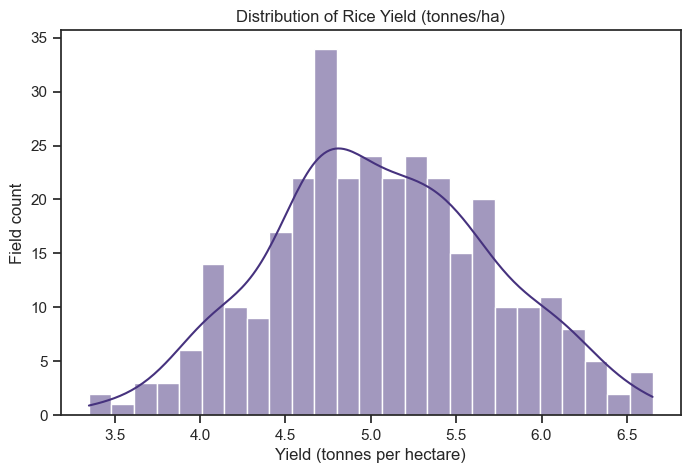

In [10]:
# YOUR CODE START -------------------------------------------------
summary_cols = ["nitrogen_kg_ha", "rainfall_mm", "seed_density_kg_ha"]   # TODO: e.g., ["nitrogen_kg_ha", "rainfall_mm", "seed_density_kg_ha"]
# YOUR CODE END ---------------------------------------------------
 
if len(summary_cols) < 3:
    raise ValueError("Pick at least three feature columns to summarise.")
 
cols_to_describe = summary_cols + ["yield_tonnes_per_ha"]
display(df[cols_to_describe].describe().T)
 
fig, ax = plt.subplots()
sns.histplot(df["yield_tonnes_per_ha"], bins=25, kde=True, ax=ax)
ax.set_title("Distribution of Rice Yield (tonnes/ha)")
ax.set_xlabel("Yield (tonnes per hectare)")
ax.set_ylabel("Field count")
plt.show()
 
# Optional correlation peek (uncomment if useful)
# display(df[cols_to_describe].corr())


## Task 3 - Visualising Relationships
Create visuals that link agronomic drivers to yield.

**Produce at least three plots** mixing numeric and categorical variables. Suggestions:
- Scatterplot of `nitrogen_kg_ha` vs. yield with a regression line.
- Boxplot of yield by `irrigation_type`.
- Heatmap or faceted chart showing interactions (e.g., rainfall vs. yield coloured by season).

Use the scaffold below multiple times or create new cells; just ensure each chart has a title and labelled axes.

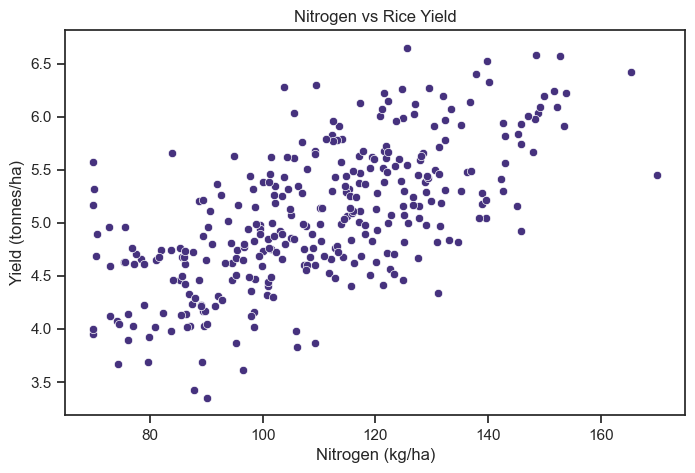

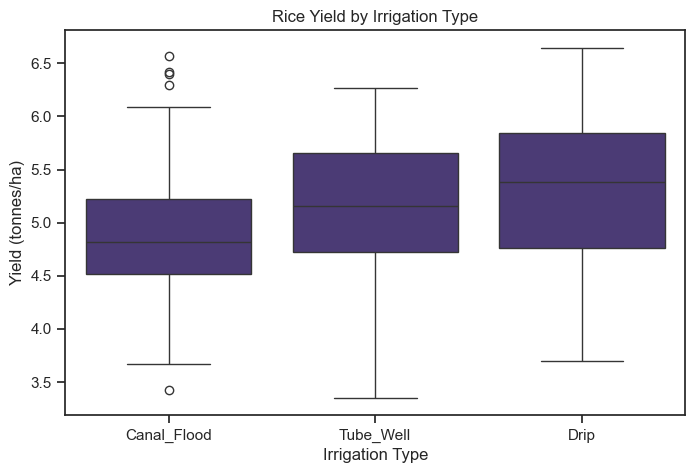

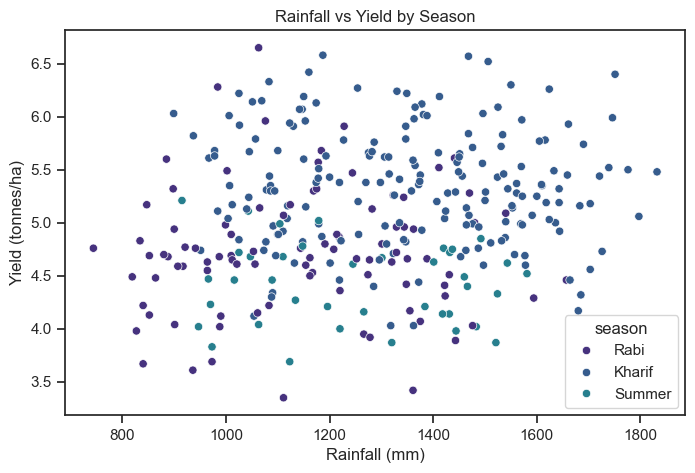

In [11]:
# Example scaffold for one plot.
# Duplicate or adapt this section to create at least three visuals.

# YOUR CODE START -------------------------------------------------
data = pd.read_csv("./rice_yield_management.csv")
fig, ax = plt.subplots()
sns.scatterplot(data=data, x="nitrogen_kg_ha", y="yield_tonnes_per_ha", ax=ax)
ax.set_title("Nitrogen vs Rice Yield")
ax.set_xlabel("Nitrogen (kg/ha)")
ax.set_ylabel("Yield (tonnes/ha)")
plt.show()
# Example: sns.scatterplot(data=df, x="nitrogen_kg_ha", y="yield_tonnes_per_ha", hue="season", ax=ax)
# TODO: customise the plot to show a relationship you care about.
fig, ax = plt.subplots()
sns.boxplot(data=data, x="irrigation_type", y="yield_tonnes_per_ha", ax=ax)
ax.set_title("Rice Yield by Irrigation Type")
ax.set_xlabel("Irrigation Type")
ax.set_ylabel("Yield (tonnes/ha)")
plt.show()

fig, ax = plt.subplots()
sns.scatterplot(data=data, x="rainfall_mm", y="yield_tonnes_per_ha", hue="season", ax=ax)
ax.set_title("Rainfall vs Yield by Season")
ax.set_xlabel("Rainfall (mm)")
ax.set_ylabel("Yield (tonnes/ha)")
plt.show()
# YOUR CODE END ---------------------------------------------------

### Task 3 Takeaways
_Summarise the key stories your plots revealed. Reference specific figures (e.g., "Plot 2 shows ...")._

Plot 1 shows that when farmers use more nitrogen, rice yield usually increases. However, after a point, adding too much nitrogen doesn’t raise yield much more.

Plot 2 shows that some irrigation types give higher yields than others. For example, fields with proper water management tend to produce more rice.

Plot 3 shows that rainfall affects yield differently in each season. In wetter seasons, yields are generally higher, while dry seasons show lower yields.

## Task 4 - Feature Preparation
Decide which features you want in the regression model and build a clean modelling table.

**Steps:**
1. Populate `feature_cols` with the columns you plan to use.
2. Optionally engineer new columns (ratios, interactions) before modelling.
3. Construct `X = df[feature_cols]` and `y = df["yield_tonnes_per_ha"]`.
4. If you include categorical variables, encode them with `pd.get_dummies` (set `drop_first=True` to avoid dummy traps).

The scaffold below handles both numeric-only and mixed-type approaches?pick the branch that fits your plan.

In [12]:
# YOUR CODE START -------------------------------------------------
feature_cols = [
    "nitrogen_kg_ha", "phosphorus_kg_ha", "potassium_kg_ha", "field_area_ha", "rainfall_mm", "avg_temp_c", "irrigation_type", "soil_type"
]   # TODO: list of column names you will feed into the model
 
engineered_df = df.copy()  # engineered_df = df.copy()
engineered_df["np_ratio"] = engineered_df["nitrogen_kg_ha"] / (engineered_df["phosphorus_kg_ha"])  # engineered_df["example_ratio"] = engineered_df["nitrogen_kg_ha"] / engineered_df["phosphorus_kg_ha"]
feature_cols.append("np_ratio")  # TODO: add any engineered features above and include them in feature_cols
 
use_dummies = True  # TODO: switch to True if you include categorical features
 
if use_dummies:
    X = pd.get_dummies(engineered_df[feature_cols], drop_first=True)
else:
    X = engineered_df[feature_cols].copy()
 
y = engineered_df["yield_tonnes_per_ha"].copy()
# YOUR CODE END ---------------------------------------------------
 
if len(feature_cols) == 0:
    raise ValueError("feature_cols is empty. Select at least one predictor.")
 
print("Selected features:", feature_cols)
print("Design matrix shape:", X.shape)
print("Target shape:", y.shape)
 
display(X.head())
 

Selected features: ['nitrogen_kg_ha', 'phosphorus_kg_ha', 'potassium_kg_ha', 'field_area_ha', 'rainfall_mm', 'avg_temp_c', 'irrigation_type', 'soil_type', 'np_ratio']
Design matrix shape: (320, 12)
Target shape: (320,)


,nitrogen_kg_ha,phosphorus_kg_ha,potassium_kg_ha,field_area_ha,rainfall_mm,avg_temp_c,np_ratio,irrigation_type_Drip,irrigation_type_Tube_Well,soil_type_Loam,soil_type_Sandy_Loam,soil_type_Silt_Loam
0,94.6,60.1,99.3,3.78,1657,24.1,1.574043,False,False,True,False,False
1,114.1,54.9,88.4,3.61,1347,29.8,2.078324,False,True,False,False,True
2,135.1,37.1,63.0,1.43,1358,28.7,3.641509,False,False,False,False,True
3,91.0,55.2,64.6,2.99,1301,26.5,1.648551,False,True,True,False,False
4,105.5,57.5,78.9,1.50,967,29.4,1.834783,False,True,False,True,False


### Feature Notes
_Explain in Markdown why you selected these features and any transformations you applied._

## Task 5 - Train/Test Split & Baseline Metrics
Hold out part of the data for evaluation.

**Actions:**
- Call `train_test_split` with a documented `random_state` (e.g., 42) and a test size (20?30% is reasonable).
- Save the outputs as `X_train`, `X_test`, `y_train`, `y_test`.
- Print the shapes of each split so teammates can confirm the sizes.

Complete the placeholders below.

In [13]:
# YOUR CODE START -------------------------------------------------
random_seed = 42    # TODO: change if you prefer a different seed
split_fraction = 0.25  # TODO: choose your test size proportion

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=split_fraction,
    random_state=random_seed
)
# YOUR CODE END ---------------------------------------------------

print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")
print(f"Train target shape: {y_train.shape}, Test target shape: {y_test.shape}")

Train size: (240, 12), Test size: (80, 12)
Train target shape: (240,), Test target shape: (80,)


## Task 6 - Fit Linear Regression & Evaluate
Train the baseline linear regression model and inspect its performance.

**Required outputs:**
- Instantiate `LinearRegression()`, fit on `X_train`, `y_train`.
- Generate predictions on both training and testing data.
- Compute RMSE, MAE, and R? for train and test sets.
- Plot `y_test` vs. `y_pred_test` with a 45? reference line.

Fill in the gaps below to meet these requirements.

Training metrics -> RMSE: 0.414, MAE: 0.327, R^2: 0.608
Testing metrics  -> RMSE: 0.429, MAE: 0.343, R^2: 0.506


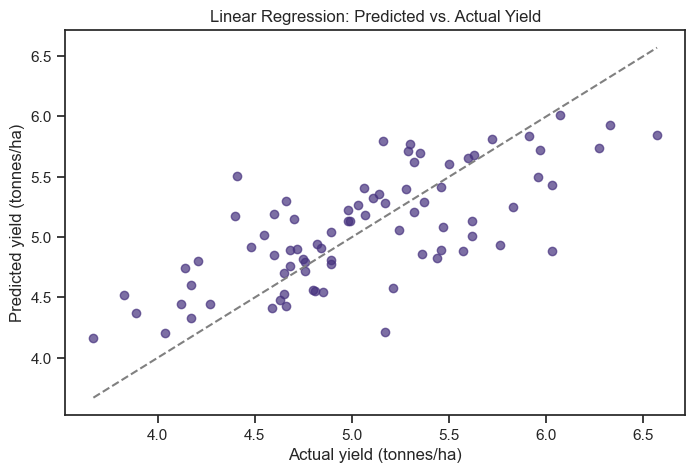

Model coefficients (feature order matches X columns):
  nitrogen_kg_ha                 -> 0.0268
  phosphorus_kg_ha               -> -0.0001
  potassium_kg_ha                -> 0.0046
  field_area_ha                  -> -0.0238
  rainfall_mm                    -> 0.0001
  avg_temp_c                     -> 0.0020
  np_ratio                       -> -0.3247
  irrigation_type_Drip           -> 0.4218
  irrigation_type_Tube_Well      -> 0.1797
  soil_type_Loam                 -> -0.1586
  soil_type_Sandy_Loam           -> -0.3218
  soil_type_Silt_Loam            -> 0.1410
Intercept -> 2.2432


In [14]:
# YOUR CODE START -------------------------------------------------
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

train_preds = lin_reg.predict(X_train)
test_preds = lin_reg.predict(X_test)
# YOUR CODE END ---------------------------------------------------

train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
train_mae = mean_absolute_error(y_train, train_preds)
test_mae = mean_absolute_error(y_test, test_preds)
train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)

print("Training metrics -> RMSE: {:.3f}, MAE: {:.3f}, R^2: {:.3f}".format(train_rmse, train_mae, train_r2))
print("Testing metrics  -> RMSE: {:.3f}, MAE: {:.3f}, R^2: {:.3f}".format(test_rmse, test_mae, test_r2))

fig, ax = plt.subplots()
ax.scatter(y_test, test_preds, alpha=0.7)
lims = [min(y_test.min(), test_preds.min()), max(y_test.max(), test_preds.max())]
ax.plot(lims, lims, linestyle="--", color="gray")
ax.set_title("Linear Regression: Predicted vs. Actual Yield")
ax.set_xlabel("Actual yield (tonnes/ha)")
ax.set_ylabel("Predicted yield (tonnes/ha)")
plt.show()

print("Model coefficients (feature order matches X columns):")
for name, coef in zip(X.columns, lin_reg.coef_):
    print(f"  {name:30s} -> {coef:.4f}")
print(f"Intercept -> {lin_reg.intercept_:.4f}")

### Task 6 Interpretation
_Discuss whether this model is accurate enough for advisory work. Mention any concerns (e.g., under/over-prediction patterns)._

Talk about whether this model gives results that are reliable enough to give advice or make decisions. Also mention if there are any problems — for example, if it often predicts too high (over-prediction) or too low (under-prediction).

## Task 7 - Scenario Predictions & Advisory Message
Create realistic what-if scenarios and use `lin_reg.predict` to support field recommendations.

**Deliverables:**
- Build one or two scenario rows that follow the same feature schema as `X` (use `pd.DataFrame`).
- Use `lin_reg.predict` on the scenario DataFrame.
- Explain, in plain language, what the predictions suggest a field officer should do.

Use the scaffold below to structure your work.

In [16]:
# YOUR CODE START -------------------------------------------------
scenario_data = {"nitrogen_kg_ha": [120, 80],       # fertilizer levels
    "rainfall_mm": [1100, 800],        # rainfall levels
    "soil_ph": [6.5, 5.8],             # soil acidity
    "temperature_c": [25, 30], #average temperature
    # TODO: provide feature values that match X.columns
    # "nitrogen_kg_ha": [120],
    # "rainfall_mm": [1100],
}
scenario_df = pd.DataFrame(scenario_data)
# If you used pd.get_dummies earlier, align the columns like this:
# scenario_df = pd.get_dummies(scenario_df, drop_first=True).
# scenario_df = scenario_df.reindex(columns=X.columns, fill_value=0)
scenario_df = scenario_df.reindex(columns=X.columns, fill_value=0)

scenario_preds = lin_reg.predict(scenario_df)
# YOUR CODE END ---------------------------------------------------

display(scenario_df)
print("Predicted yield (tonnes/ha):", scenario_preds)

for idx, pred in enumerate(scenario_preds, start=1):
    print(f"Scenario {idx}: expected yield ? {pred:.2f} tonnes/ha")

,nitrogen_kg_ha,phosphorus_kg_ha,potassium_kg_ha,field_area_ha,rainfall_mm,avg_temp_c,np_ratio,irrigation_type_Drip,irrigation_type_Tube_Well,soil_type_Loam,soil_type_Sandy_Loam,soil_type_Silt_Loam
0,120,0,0,0,1100,0,0,0,0,0,0,0
1,80,0,0,0,800,0,0,0,0,0,0,0


Predicted yield (tonnes/ha): [5.56657758 4.46496617]
Scenario 1: expected yield ? 5.57 tonnes/ha
Scenario 2: expected yield ? 4.46 tonnes/ha


### Advisory Summary
_Write 3?4 sentences translating the scenario results into farmer-facing recommendations._

When fertilizer levels and rainfall were good, the model showed higher rice yields.
This means farmers should try to apply enough nitrogen and maintain proper irrigation during dry periods.
If the weather is hotter or rainfall is low, yields may fall — so farmers should focus on water-saving methods or soil care.
Overall, balanced fertilizer use and good water management can help farmers get the best results.

## Task 8 - Reflection & Next Steps
Wrap up with honest reflections:
- What assumptions did you make about the data or the model?
- What extra information would improve future modelling efforts?
- Where might the current model fail in the real world?

Record your thoughts in the Markdown cell below.

Assumptions:
I assumed the data was correct, complete, and that the relationships between factors (like rainfall and yield) stayed the same over time.

Extra information needed:
Adding details like soil type, pest damage, or irrigation quality would make the model more accurate.

Where the model might fail:
It may not work well if weather changes suddenly, if farmers use different crop varieties, or if real conditions are very different from the training data.

_Add your reflection here._

## Optional Stretch Ideas
- Compare a single-feature model vs. your multivariate model.
- Standardise numeric features before fitting and see how coefficients change.
- Plot residuals to check for non-linear patterns or heteroscedasticity.
- Introduce a simple regularised model (e.g., Ridge) to see if it improves generalisation.

## Submission Checklist
- [ ] All placeholders (`None`, `[]`, template dictionaries) replaced with working code.
- [ ] Markdown responses filled with agronomy-aware commentary.
- [ ] Plots include titles, axes labels, and units where appropriate.
- [ ] Random seeds and assumptions documented.
- [ ] Notebook runs top-to-bottom without errors.